In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")[["Age","Pclass","Fare","Survived"]]

df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [53]:
!cd

D:\Python\python_projects\master_jupyter_notebook


In [54]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is C496-2329

 Directory of D:\Python\python_projects\master_jupyter_notebook

03/17/2024  01:39 PM    <DIR>          .
03/15/2024  12:28 AM    <DIR>          ..
03/15/2024  11:04 PM             3,229 .gitignore
03/15/2024  12:35 AM    <DIR>          .ipynb_checkpoints
03/15/2024  12:34 AM    <DIR>          env
03/17/2024  01:30 PM                76 example.txt
03/17/2024  01:30 PM                92 hello_world.py
03/17/2024  01:39 PM           236,551 knn_imputer.ipynb
03/15/2024  01:00 AM                58 requirements.txt
03/17/2024  12:58 AM                12 sum.py
               6 File(s)        240,018 bytes
               4 Dir(s)  65,664,921,600 bytes free


In [55]:
!pip install numpy

In [56]:
!git init

Reinitialized existing Git repository in D:/Python/python_projects/master_jupyter_notebook/.git/


## Display all rows and columns

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.0000,C148,C


In [59]:
pd.set_option("display.max_rows",20)

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.0000,C148,C


In [61]:
pd.set_option("display.max_columns",10)

In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.0000,C148,C


## Supress Warnings

In [63]:
import warnings
warnings.filterwarnings('ignore')

## Print all variables

In [64]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [65]:
df.describe()
df.info()
a=2
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2

## Print output of any other cell

In [66]:
Out[1]

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


## Close large output

In [67]:
Out

{1:     Age  Pclass     Fare  Survived
 0  22.0       3   7.2500         0
 1  38.0       1  71.2833         1
 2  26.0       3   7.9250         1
 3  35.0       1  53.1000         1
 4  35.0       3   8.0500         0,
 7:      PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex  ...  Parch  \
 0                              Braund, Mr. Owen Harris    male  ...      0   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0   
 2                               Heikkinen, Miss. Laina  female  ...  

## Remove extra output

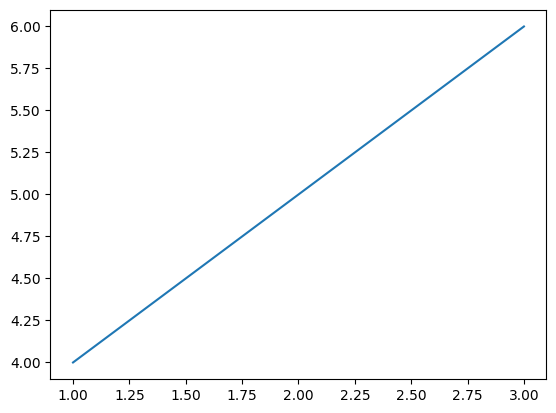

In [68]:
import matplotlib.pyplot as plt

plt.plot([1,2,3],[4,5,6])

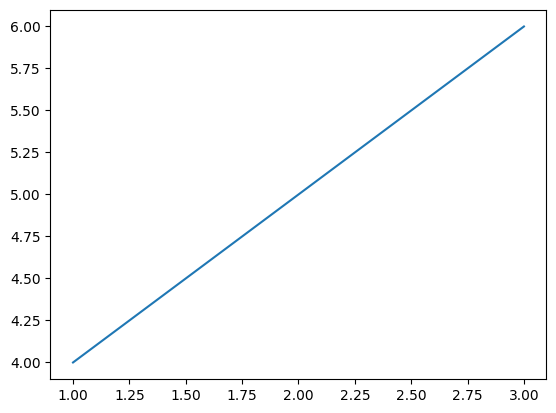

In [69]:
plt.plot([1,2,3],[4,5,6]); #no additional information is being shown with ';'

## Magic Commands

% is used for line magics. Line magic commands apply only to the rest of the line on which they are used.

%% is used for cell magics. Cell magic commands apply to the entire cell in which they are the first line. This means that everything below the %% command (upto the end of the cell) is considered part of the command. Cell magics allow you to write more complex or mulit-linear commands, affecting or transforming the entire cell

## %time

In [70]:
# Example of using %time for a single line of code
%time sum(range(10000000))

CPU times: total: 62.5 ms
Wall time: 207 ms


49999995000000

In [71]:
%%time
# Example of using %%time for an entire cell
total=0
for i in range(10000000):
    total+=1
print(total)

10000000
CPU times: total: 62.5 ms
Wall time: 692 ms


In [72]:
%timeit sum(range(10000000))

196 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## %run

In [73]:
%run sum.py

9


## %% writefile

In [74]:
%%writefile example.txt

Hello, this is the first line of the file.
And this is the second line.

Overwriting example.txt


In [75]:
%%writefile hello_world.py
def hello_world():
    print("Hello World!")
if __name__=='__main__':
    hello_world()

Overwriting hello_world.py


In [76]:
%run hello_world.py

Hello World!


## %%html

In [77]:
%%html
<div style='color:red;font-size:20px;'>Hello, world!</div>

In [78]:
%%html
<img src="https://static.remove.bg/sample-gallery/graphics/bird-thumbnail.jpg" alt="Sample Image" width="300">

In [79]:
%%html
<table border="1">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th>
    <th>Age</th>
  </tr>
  <tr>
    <td>John</td>
    <td>Doe</td>
    <td>50</td>
  </tr>
  <tr>
    <td>Jane</td>
    <td>Doe</td>
    <td>45</td>
  </tr>
</table>

Firstname,Lastname,Age
John,Doe,50
Jane,Doe,45


In [80]:
%%html
<button onclick="alert('Hello, world!')">Click Me!</button>

## %%javascript

In [81]:
%%javascript
alert('Hello, Jupyter!');

<IPython.core.display.Javascript object>

In [82]:
%%html
<select id="dataSelection">
    <option value="data1">Dataset 1</option>
    <option value="data2">Dataset 2</option>
    <option value="data3">Dataset 3</option>
</select>
<div id="displayArea">Selected Dataset Information will appear here.</div>

In [83]:
%%javascript

// Function to update display based on selection
function updateDisplay() {
    var selection = document.getElementById('dataSelection').value;
    var displayText = 'You selected ' + selection + ', displaying results...';
    // This could be a place to dynamically update a chart or data visualization
    document.getElementById('displayArea').innerText = displayText;
}

// Add event listener to dropdown
document.getElementById('dataSelection').addEventListener('change', updateDisplay);

// Initialize display
updateDisplay();

<IPython.core.display.Javascript object>

## %%latex

In [84]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1{c} \, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1{c} \, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

# 3. Jupyter Widgets

In [85]:
# !pip install ipywidgets
# !pip install IPython
# !pip install plotly

In [99]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test Slider:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(slider)

IntSlider(value=7, continuous_update=False, description='Test Slider:', max=10)

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

def plot_sine_wave(frequency=1.0):
    # Generate x values
    x = np.linspace(0, 2 * np.pi, 100)
    # Calculate y values based on the current frequency
    y = np.sin(x * frequency)
    
    # Plotting the sine wave
    plt.figure(figsize=(10,4))
    plt.plot(x, y)
    plt.ylim(-1.1, 1.1)
    plt.title('Sine Wave')
    plt.show()

# Create an interactive widget for the sine wave frequency
interactive_plot = interactive(plot_sine_wave, frequency=(1, 10, 0.1))
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='frequency', max=10.0, min=1.0), Output()), _dom_clas…

In [101]:
import pandas as pd
import numpy as np
import plotly.express as px
from ipywidgets import interactive, IntSlider, FloatSlider

# Generate a random dataset
np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'data_value': np.random.rand(100) * 100  # A column to filter by
})

# Function to update the plot
def update_plot(marker_size, filter_value):
    filtered_df = df[df['data_value'] < filter_value]
    
    fig = px.scatter(
        filtered_df, x='x', y='y', size=np.full(len(filtered_df), marker_size),
        size_max=marker_size, title='Interactive Scatter Plot'
    )
    fig.update_traces(marker=dict(opacity=0.8))
    fig.update_layout(transition_duration=500)
    fig.show()

# Create widgets
marker_size_slider = IntSlider(min=5, max=30, value=10, description='Marker Size:')
filter_slider = FloatSlider(min=df['data_value'].min(), max=df['data_value'].max(), value=df['data_value'].max(), description='Filter Value:')

# Display interactive plot
interactive_plot = interactive(update_plot, marker_size=marker_size_slider, filter_value=filter_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=10, description='Marker Size:', max=30, min=5), FloatSlider(value=99.005…

# 4 Jupyter Extensions

In [103]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

Traceback (most recent call last):
  File "D:\Python\python_projects\master_jupyter_notebook\env\lib\runpy.py", line 192, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\Python\python_projects\master_jupyter_notebook\env\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Python\python_projects\master_jupyter_notebook\env\Scripts\jupyter-contrib.EXE\__main__.py", line 7, in <module>
  File "D:\Python\python_projects\master_jupyter_notebook\env\lib\site-packages\jupyter_core\application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "D:\Python\python_projects\master_jupyter_notebook\env\lib\site-packages\traitlets\config\application.py", line 1073, in launch_instance
    app = cls.instance(**kwargs)
  File "D:\Python\python_projects\master_jupyter_notebook\env\lib\site-packages\traitlets\config\configurable.py", line 583, in instance
    inst = cls(*args, **kwargs)
  File "D:\Python\pytho

In [93]:
# table of contents

In [95]:
# Code folding

In [96]:
# Execute time

In [97]:
# Hide Input

In [98]:
# Variable Inspector

# 5 ChatGPT extension